In [124]:
!conda install --yes scikit-learn
!conda install --yes matplotlib
!conda install --yes seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/brunopaes/anaconda3/envs/p36

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-0.25.3

In [203]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn
import pandas

In [3]:
df = pandas.read_csv('../data/datasource.csv').set_index('Ocorrencia')

### Checking duplicated values

Assuming that the 'Ocorrencia' is a unique code for the transaction itself. Let's check if there's any duplicated occurrence.

```python
len(df.index.unique())
```
If the dataset doesn't present any duplicated values, this piece of code should return, as output, 150.000 data entries. Nevertheless it returned only 64.958 values - meaning that this dataset presents around 85.042 duplicated data entries.

```python
len(df) - len(df.index.unique())
```

The duplicated values will be kept on analysis and training in modeling step. Due the nature of this dataset, this duplicate values could have been naturally generated - meaning that one occurrence could occur more than once - or, due the lack of available training material, some transactions could have been artificially generated.

--------------------------------

In [4]:
# Checking the number of unique values.
len(df.index.unique())

64958

In [13]:
# Checking the number of duplicated entries.
len(df) - len(df.index.unique())

85042

### Exploratory Analysis

Section aimed on checking the data distribution and data behaviour.

- N.A. values?
- Outliers?
- Min.
- Max.
- Mean.
- Stdev.

-------------------------

In [44]:
df.describe()

,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,PP10,...,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.058999,-0.000790,-0.192183,-0.037416,0.061588,-0.025715,0.026695,-0.004257,0.028148,-0.003959,...,0.009957,0.027398,0.007275,-0.002739,-0.035211,-0.001127,-0.000535,-0.001028,-88.602261,0.001580
std,1.894453,1.623712,1.406053,1.397615,1.341265,1.310820,1.194923,1.205874,1.106154,1.075456,...,0.739429,0.707714,0.622620,0.606964,0.506130,0.483787,0.397662,0.307684,247.302373,0.039718
min,-2.454930,-22.057729,-9.382558,-16.875344,-32.911462,-21.307738,-31.527244,-16.635979,-15.594995,-23.745136,...,-27.202839,-10.503090,-19.002942,-4.022866,-7.519589,-3.220178,-12.152401,-22.620072,-19656.530000,0.000000
25%,-1.243456,-0.802149,-1.138473,-0.812624,-0.526469,-0.424574,-0.527260,-0.340863,-0.565387,-0.452162,...,-0.165038,-0.466423,-0.128298,-0.431560,-0.369398,-0.247606,-0.090965,-0.078861,-77.662500,0.000000
50%,0.042647,-0.082193,-0.359076,-0.039549,0.124219,0.245177,-0.013129,-0.037083,0.095975,0.096236,...,0.033794,0.014600,0.020008,-0.049357,-0.071030,0.057265,-0.004792,-0.016759,-22.040000,0.000000
75%,0.952018,0.588600,0.555060,0.816575,0.751890,0.734024,0.564334,0.193112,0.678488,0.515473,...,0.225362,0.540801,0.164620,0.348762,0.274183,0.331361,0.068544,0.048427,-5.410000,0.000000
max,36.802320,63.344698,33.680984,5.683171,31.356750,21.929312,43.557242,73.216718,13.434066,24.588262,...,34.830382,10.933144,44.807735,2.824849,10.295397,2.604551,22.565679,11.710896,-0.000000,1.000000


### Describe Analysis Result

This section summarizes the initial analysis on this dataset.

The command below allows to summarize each variable and retrieve the main statistical characteristics. 

```python
df.describe()
```

The first thing to be noticed is at 'Sacado' variable - the amount of money withdrawn. 


| Statistical Measurement | Value        |
| :---------------------: | :----------: |
| Mean                    | -88.602261	 |
| Standard Deviation      | 247.302373	 |
| Min                     | -19656.53    |
| Max                     | -0.00        |

How can be observed on this chart. The behaviour of 'Sacado' variable is pretty weird. First of all, this variable presents the highest standard deviation of all variables (247.30).

```python
df.describe().loc['std'].sort_values(ascending=False).head()
```

The mean, min and max values are pretty strange as well - with all of them being negative or null values. How this values could be negative/null values if this variable it was meant to represent the total withdrawn value of the transaction?

__Possible errors:__

- Acquistion errors?
- Parsing issues?

Other variables seems to behave pretty well (well distributed along the mean value - almost a normal curve) - even didn't knowing what they represent (the max values are high? the min values are low?).

_obs: Even with the lower deviation. On training, a simple normalization will be made on this dataset._

-------------

In [85]:
df.describe().loc['std'].sort_values(ascending=False).head()

Sacado    247.302373
PP1         1.894453
PP2         1.623712
PP3         1.406053
PP4         1.397615
Name: std, dtype: float64

### Some plots

On this section are plots for visualizing the dispersion of some 'random' variables.

----------------

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a305569e8>,
      dtype=object)

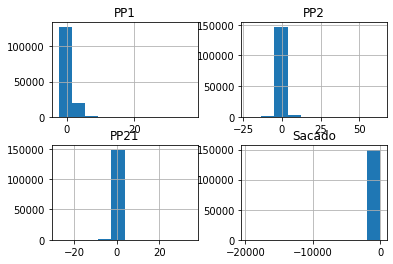

In [91]:
df[['PP1', 'PP2', 'PP21', 'Sacado']].hist()

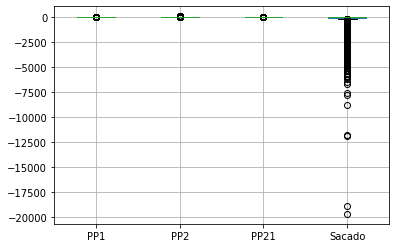

In [95]:
# As it can be observed. The Sacado variable has a lot of outliers - removing and analysing it alone 
# (for not disturbing the scale)
df[['PP1', 'PP2', 'PP21', 'Sacado']].boxplot()

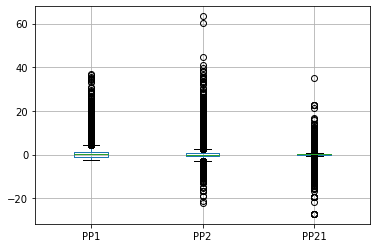

In [94]:
# There are outliers on it - predicted it on histogram.
df[['PP1', 'PP2', 'PP21']].boxplot()

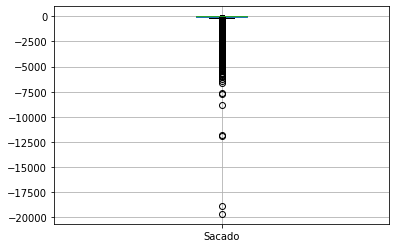

In [97]:
df[['Sacado']].boxplot()

### Seeking for N.A. values

This dataset does not present N.A./Blank values.

----------------------------

In [105]:
sum(df.index.isna())

0

In [61]:
dict_na = {
    'columns': list(df.columns),
    'na': []
}

for i in range(len(df.columns)):
    dict_na.get('na').append(sum(df[df.columns[i]].isna()))

pandas.DataFrame(dict_na).set_index('columns')

,na
columns,
PP1,0
PP2,0
PP3,0
PP4,0
PP5,0
PP6,0
PP7,0
PP8,0
PP9,0


### Does this dataset is non-balanced?

This section aims on checking if the dataset is non-balanced - are more frauds than non-frauds? Vice-Versa?

Table below assumes that the y variable - Fraude - has only 2 unique values - presented in table.

```python
df.Fraude.unique()
```

| Value | Meaning   | Total    | Percentage |
| :---: | :-------: | :------: | :--------: |
| 0     | Non Fraud | 149.763  | 99,842 %   |
| 1     | Fraud     | 237      | 0,0158 %   |

As can be observed on the table above. It's been assumed that 0 represents a non-fraudulent transaction and 1 represents a fraudulent transaction. This dataset is pretty unbalanced - with less than 1 % being fraudulent transactions (237 data entries). This scenario, on model training steps would be a problem - the model probably will be overfitted in fraudulents occurrences. To prevent it, it must be added some new - artificially generated or naturally acquired - fraudulents data entries.

----------------------------------------

In [210]:
# Checking how many unique entries this variable presents.
df.Fraude.unique()

array([0, 1])

In [213]:
# Checking how many data entries are non-fraud or 0
print(len(df[df['Fraude'] == 0]))

# Checking the percentage of non-fraud transactions
print(len(df[df['Fraude'] == 0])/len(df.Fraude))

149763
0.99842


In [214]:
# Checking how many data entries are fraud or 1
len(df[df['Fraude'] == 1])

# Checking the percentage of fraud transactions
print(len(df[df['Fraude'] == 1])/len(df.Fraude))

0.00158


### Dimensionality Reduction

This section aims on reduct the dimensionality of this dataset.

__It can be used:__

- linear regression, correlation and statistically relevance;
- random forests and tree classifiers;
- PCA;

_obs: despite the robustness of PCA, some articles presents issues on its performance - losing for simpler techniques._

-----------------------

In [23]:
x = pandas.DataFrame(df[df.columns[0:-1]])
y = pandas.DataFrame(df[df.columns[-1]])

In [200]:
# Multiple Linear Regression
lm = linear_model.LinearRegression().fit(x,y)

model = SelectFromModel(lm, prefit=True)
model.transform(x).shape

(150000, 9)

In [202]:
# Support Vector Machine
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x.values, y.Fraude.values)

model = SelectFromModel(lsvc, prefit=True)
model.transform(x).shape

(150000, 19)